## Equal Division Time Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


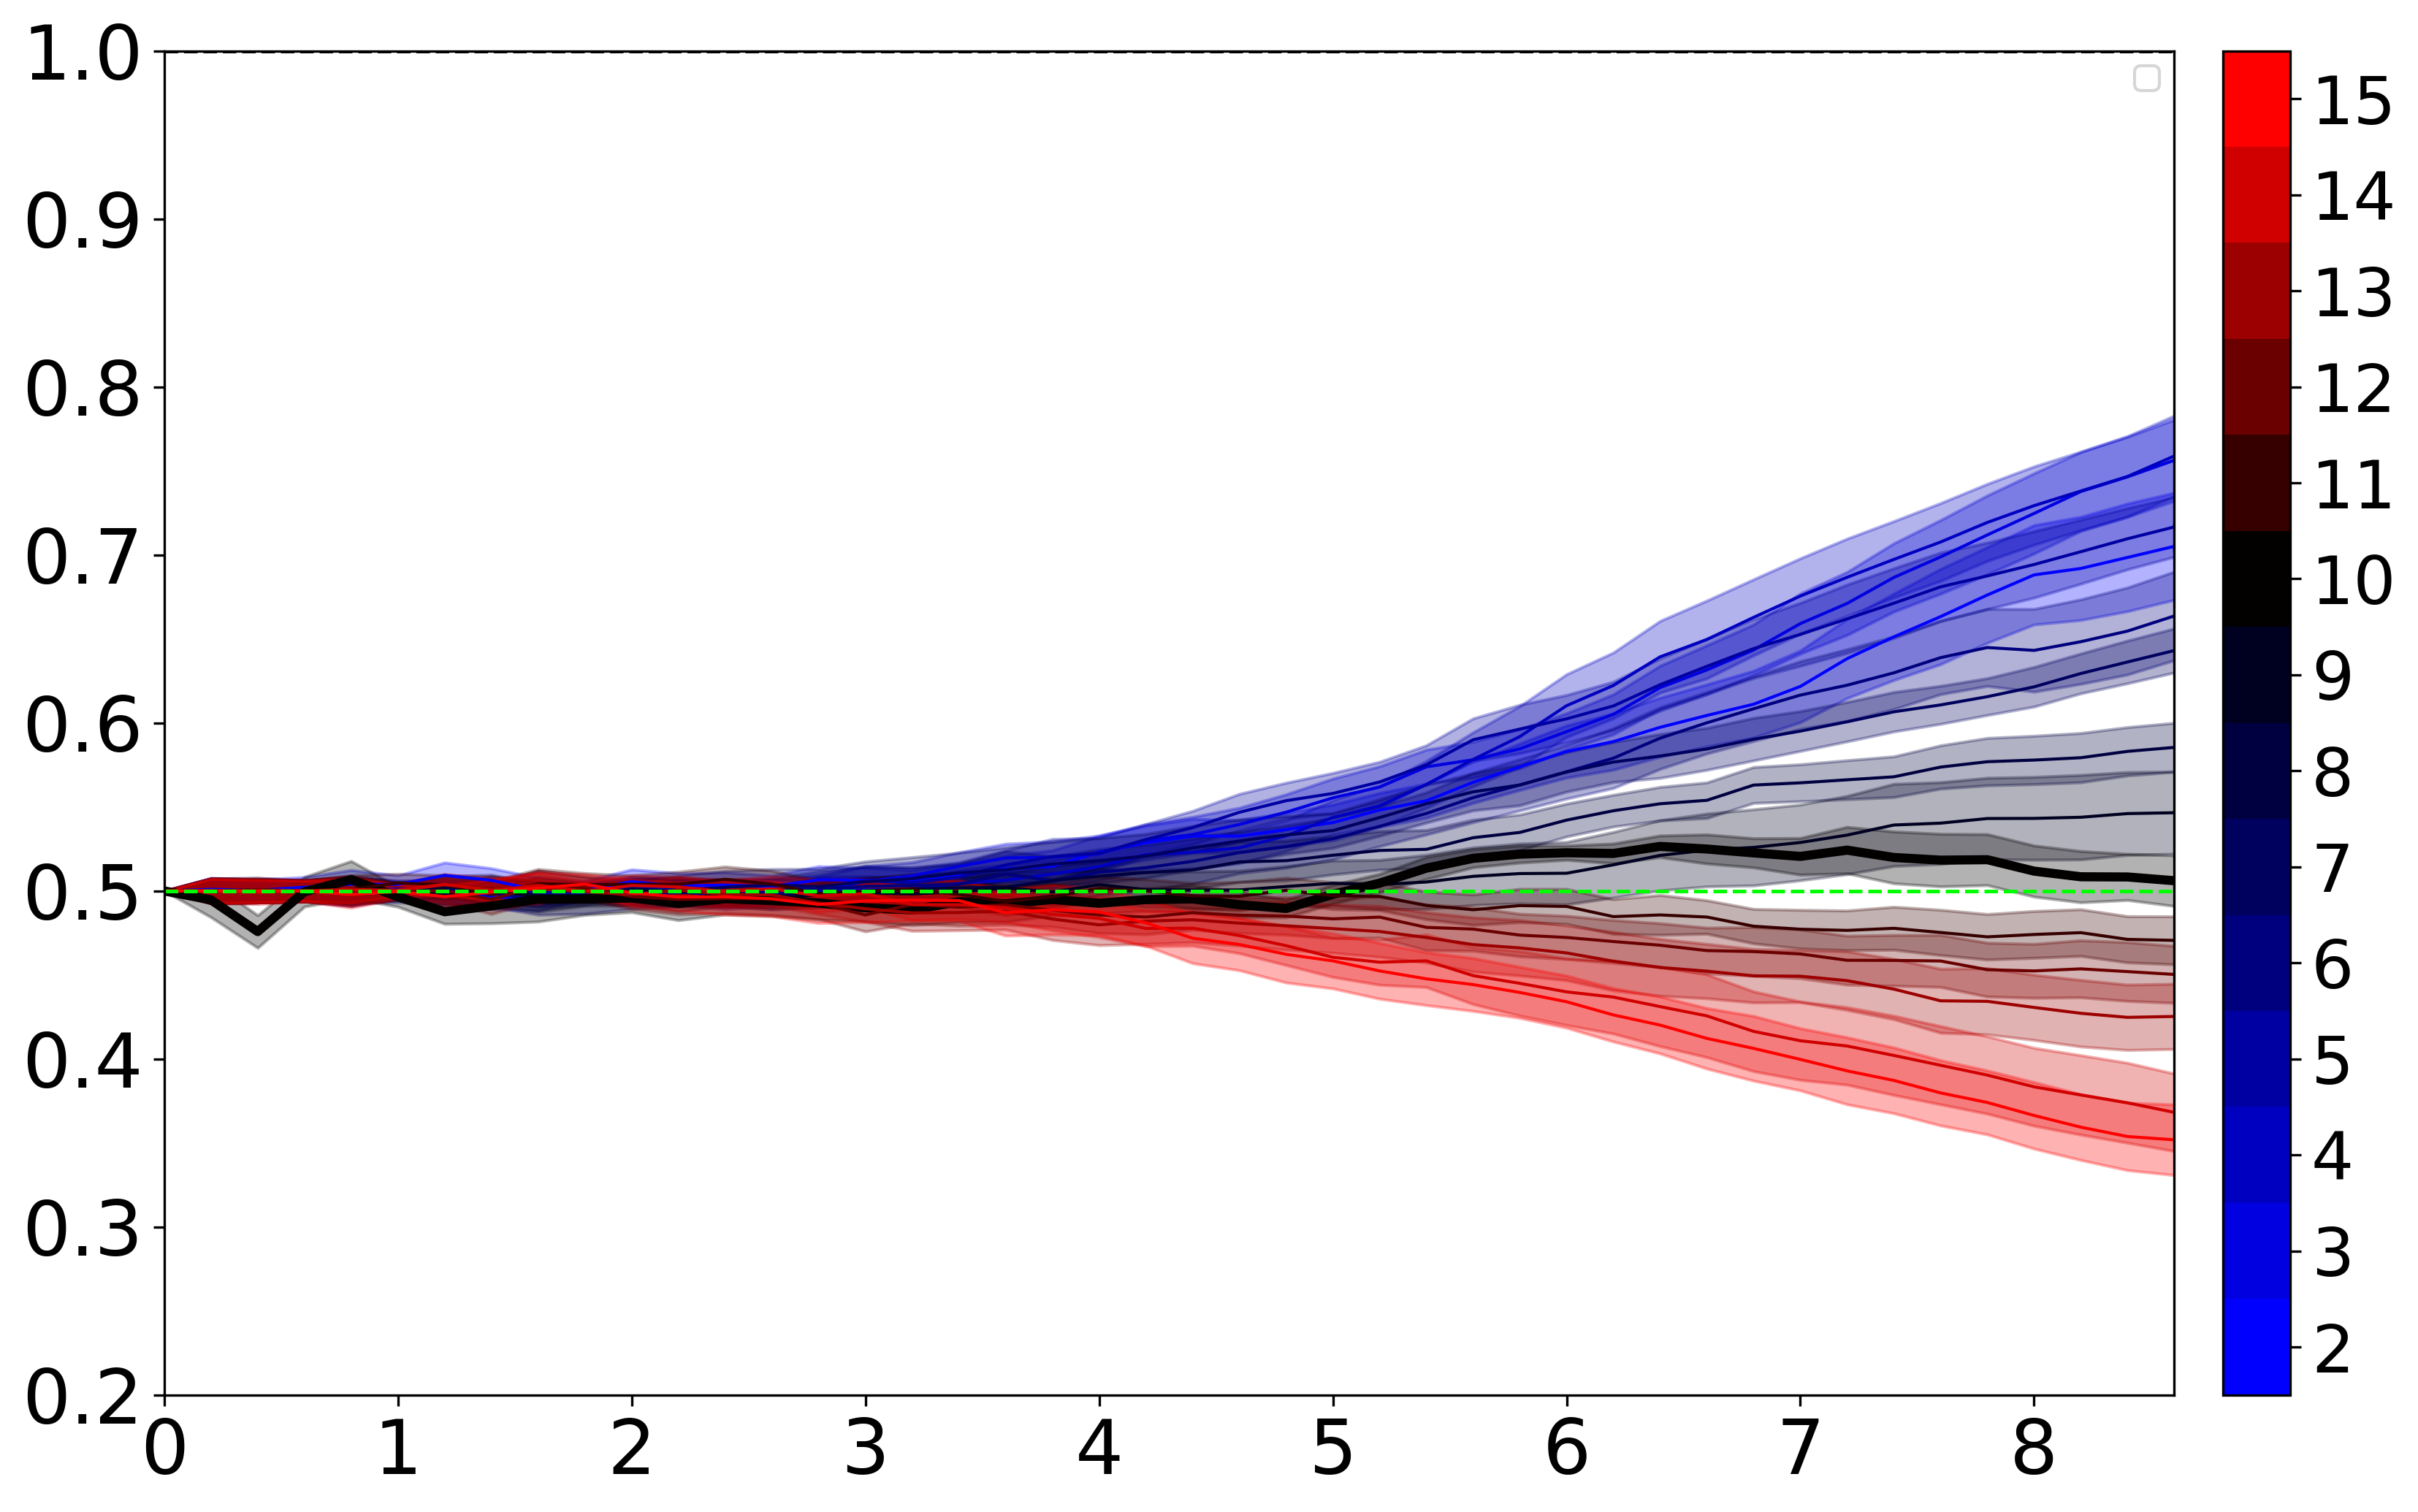

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors


df = pd.read_csv("/home/mratman1/activeMatterCommunities/all_10_periphery_fractions_20d.csv")


df['Aspect_Ratio_1'], df['Aspect_Ratio_2'] = np.where(
    df['Aspect_Ratio_2'] == 10,
    (df['Aspect_Ratio_2'], df['Aspect_Ratio_1']),
    (df['Aspect_Ratio_1'], df['Aspect_Ratio_2'])
)

df_combined = df.copy()
df_combined['Aspect_Ratio'] = df_combined.apply(
    lambda row: (row['Aspect_Ratio_1'], row['Aspect_Ratio_2']) if row['Aspect_Ratio_1'] != 10 else (row['Aspect_Ratio_2'], row['Aspect_Ratio_1']),
    axis=1
)

grouped = df_combined.groupby(['Time', 'Aspect_Ratio']).agg({
    'Avg_Fraction_Asp1': 'mean',
    'SEM_Avg_Fraction_Asp1': lambda x: np.sqrt(np.sum(x**2)) / len(x)  # Combine SEMs in quadrature
}).reset_index()

colors = ['blue', 'black', 'red']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)

norm = mcolors.TwoSlopeNorm(vmin=2, vcenter=10, vmax=15)

fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

for asp, data_subset in grouped.groupby('Aspect_Ratio'):
    times = data_subset['Time']
    times = [time / 4 for time in times]
    avg_output1 = data_subset['Avg_Fraction_Asp1']
    sem_output1 = data_subset['SEM_Avg_Fraction_Asp1']
    
    asp1, asp2 = asp

    color = cmap(norm(asp1))

    linewidth = 3 if (asp1, asp2) == (10, 10) else 1

    ax.fill_between(times, avg_output1 - sem_output1, avg_output1 + sem_output1, color=color, alpha=0.3)
    ax.plot(times, avg_output1, '-', color=color, linewidth=linewidth)

ax.axhline(1, color='black', linestyle='--', linewidth=1.2)
ax.axhline(0.5, color='lime', linestyle='--', linewidth=1.2)

ax.tick_params(axis='both', labelsize=25)
ax.set_ylim(0.2, 1.0)
ax.set_xlim(0, 8.6) 
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

boundaries = [i - 0.5 for i in range(2, 17)]  


cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, boundaries=boundaries)
cbar.set_ticks(range(2, 16))  
cbar.ax.tick_params(labelsize=22)
cbar.set_ticklabels([str(i) for i in range(2, 16)])

plt.legend(loc='best')
plt.tight_layout()
plt.show()


Grouped DataFrame:
    Aspect_Ratio  Avg_Fraction_Asp1  SEM_Avg_Fraction_Asp1
0    (2.0, 10.0)           0.777847               0.037788
1    (3.0, 10.0)           0.833983               0.026645
2    (4.0, 10.0)           0.815988               0.024379
3    (5.0, 10.0)           0.769445               0.017033
4    (6.0, 10.0)           0.714398               0.032972
5    (7.0, 10.0)           0.689486               0.014671
6    (8.0, 10.0)           0.620015               0.017600
7    (9.0, 10.0)           0.558463               0.025413
8   (10.0, 10.0)           0.497090               0.019995
9   (11.0, 10.0)           0.461724               0.014876
10  (12.0, 10.0)           0.435451               0.022679
11  (13.0, 10.0)           0.410405               0.018456
12  (14.0, 10.0)           0.337485               0.022489
13  (15.0, 10.0)           0.322144               0.023367
Aspect Ratios (2): [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


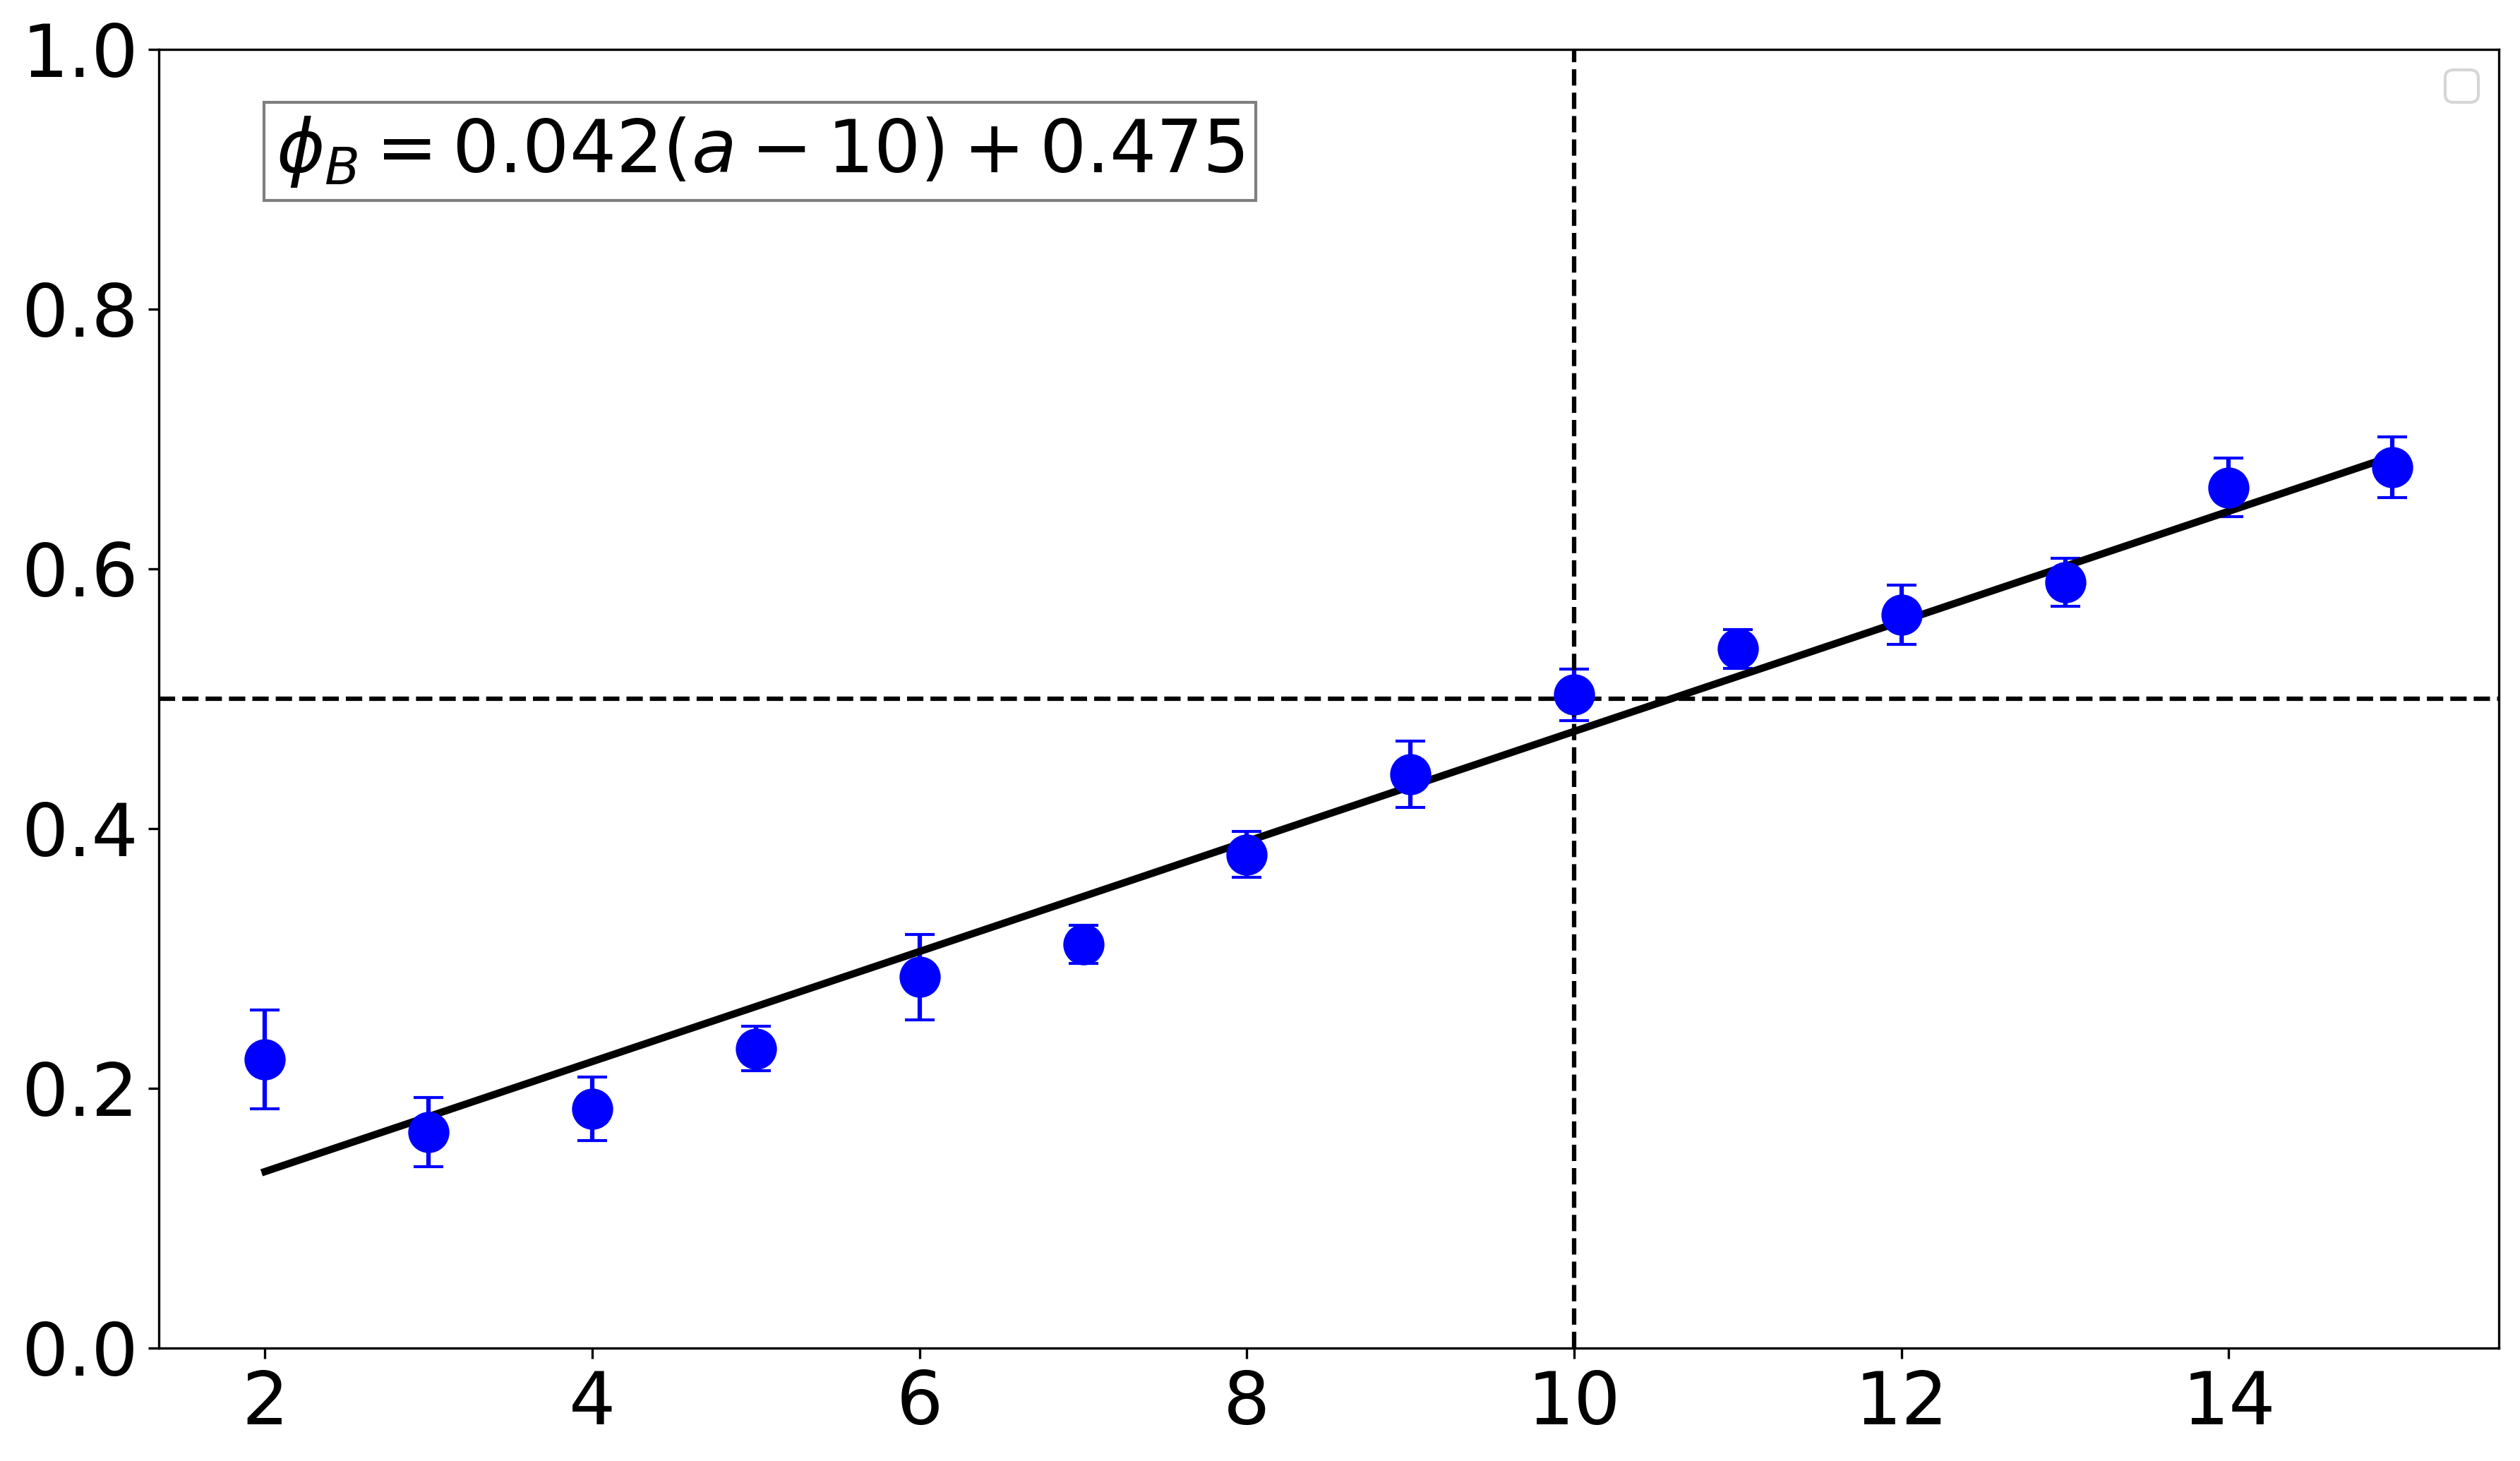

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit


df = pd.read_csv("/home/mratman1/activeMatterCommunities/all_10_periphery_fractions.csv")


df_third_to_last = df.groupby(['Aspect_Ratio_1', 'Aspect_Ratio_2']).nth(-8).reset_index()


df_third_to_last['Aspect_Ratio'] = df_third_to_last.apply(
    lambda row: (row['Aspect_Ratio_1'], row['Aspect_Ratio_2']) if row['Aspect_Ratio_2'] == 10 else (row['Aspect_Ratio_2'], row['Aspect_Ratio_1']),
    axis=1
)

df_filtered = df_third_to_last[df_third_to_last['Aspect_Ratio'].apply(lambda x: 10 in x)]

grouped = df_filtered.groupby('Aspect_Ratio').agg({
    'Avg_Fraction_Asp1': 'mean',
    'SEM_Avg_Fraction_Asp1': lambda x: np.sqrt(np.sum(x**2)) / len(x)  
}).reset_index()


print("Grouped DataFrame:")
print(grouped)

aspect_ratios_2 = [asp[0] for asp in grouped['Aspect_Ratio']]

fraction_asp1 = 1 - grouped['Avg_Fraction_Asp1']
sem_asp1 = grouped['SEM_Avg_Fraction_Asp1']


print("Aspect Ratios (2):", aspect_ratios_2)
print("1 - Fraction Asp1:", fraction_asp1)
print("SEM Asp1:", sem_asp1)


if len(aspect_ratios_2) == 0 or len(fraction_asp1) == 0:
    print("No valid data to plot. Please check your data and filtering conditions.")
else:
    
    def linear_fit(asp2, slope, intercept):
        return slope * (asp2 - 10) + intercept

  
    popt, _ = curve_fit(linear_fit, aspect_ratios_2, fraction_asp1)

   
    cmap = sns.diverging_palette(250, 15, s=90, l=50, n=9, center="dark", as_cmap=True)
    norm = mcolors.TwoSlopeNorm(vmin=2, vcenter=10, vmax=15)

    
    fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    
    ax.errorbar(aspect_ratios_2, fraction_asp1, yerr=sem_asp1, fmt='o', 
                ecolor='blue', capsize=5, markersize=13, color='blue')


    fit_asp2 = np.linspace(min(aspect_ratios_2), max(aspect_ratios_2), 100)
    fit_fraction = linear_fit(fit_asp2, *popt)
    ax.plot(fit_asp2, fit_fraction, '-', color='black', linewidth=2.5)

    
    ax.axvline(10, color='black', linestyle='--', linewidth=1.5)

    
    ax.axhline(0.5, color='black', linestyle='--', linewidth=1.5)


    ax.tick_params(axis='both', labelsize=25)  
    ax.set_ylim(0, 1.0)

    
    slope, intercept = popt
    equation_text = fr'$\phi_B = {slope:.3f}(a-10) + {intercept:.3f}$'
    ax.text(0.05, 0.95, equation_text, transform=ax.transAxes, fontsize=25, 
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

   
    ax.legend(loc='best', fontsize=14)

    plt.tight_layout()
    plt.show()


## Adding an R^2 Value

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Grouped DataFrame:
    Aspect_Ratio  Avg_Fraction_Asp1  SEM_Avg_Fraction_Asp1
0    (2.0, 10.0)           0.830868               0.033181
1    (3.0, 10.0)           0.893788               0.023975
2    (4.0, 10.0)           0.851147               0.024825
3    (5.0, 10.0)           0.813521               0.016331
4    (6.0, 10.0)           0.759940               0.031430
5    (7.0, 10.0)           0.722954               0.015855
6    (8.0, 10.0)           0.650183               0.021640
7    (9.0, 10.0)           0.566941               0.023678
8   (10.0, 10.0)           0.500047               0.023540
9   (11.0, 10.0)           0.447482               0.015707
10  (12.0, 10.0)           0.420428               0.029340
11  (13.0, 10.0)           0.393430               0.021658
12  (14.0, 10.0)           0.314582               0.019164
13  (15.0, 10.0)           0.295790               0.025988
Aspect Ratios (2): [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
1 - Fraction Asp1: 

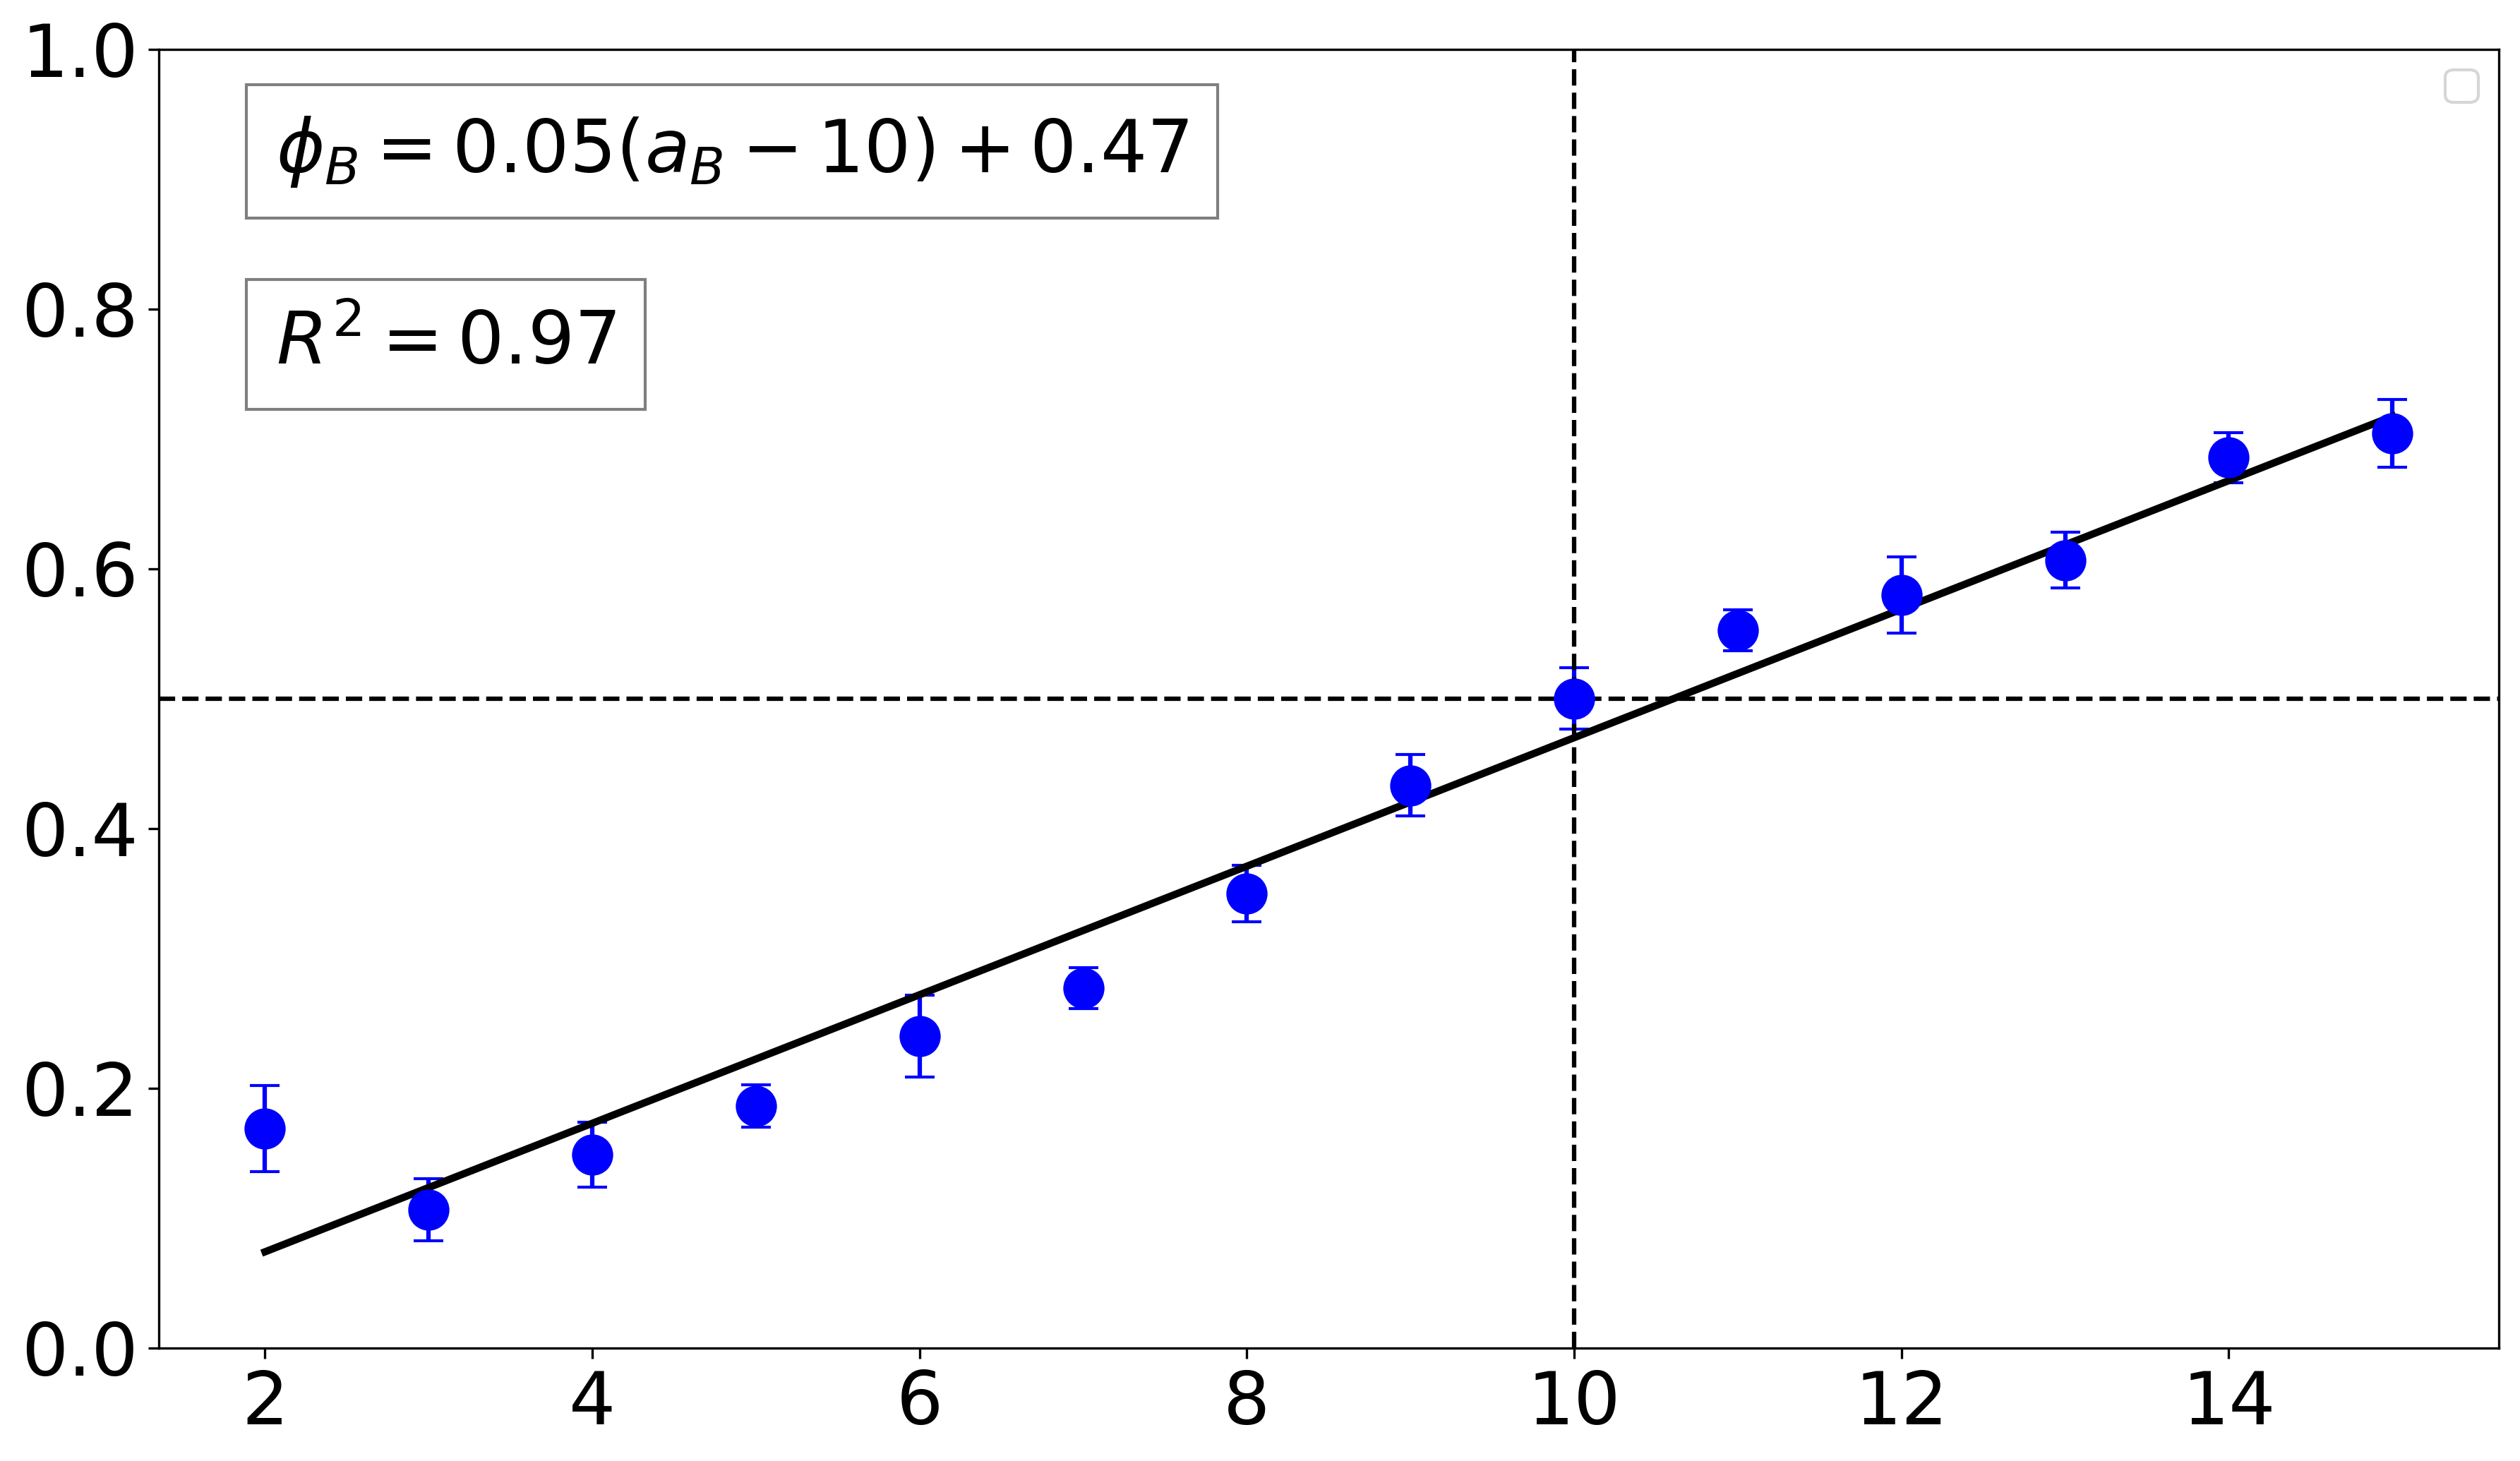

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit


df = pd.read_csv("/home/mratman1/activeMatterCommunities/all_10_periphery_fractions.csv")


df_third_to_last = df.groupby(['Aspect_Ratio_1', 'Aspect_Ratio_2']).nth(-8).reset_index()


df_third_to_last['Aspect_Ratio'] = df_third_to_last.apply(
    lambda row: (row['Aspect_Ratio_1'], row['Aspect_Ratio_2']) if row['Aspect_Ratio_2'] == 10 else (row['Aspect_Ratio_2'], row['Aspect_Ratio_1']),
    axis=1
)


df_filtered = df_third_to_last[df_third_to_last['Aspect_Ratio'].apply(lambda x: 10 in x)]


grouped = df_filtered.groupby('Aspect_Ratio').agg({
    'Avg_Fraction_Asp1': 'mean',
    'SEM_Avg_Fraction_Asp1': lambda x: np.sqrt(np.sum(x**2)) / len(x)  
}).reset_index()


print("Grouped DataFrame:")
print(grouped)



aspect_ratios_2 = np.array([asp[0] for asp in grouped['Aspect_Ratio']])
fraction_asp1 = 1 - grouped['Avg_Fraction_Asp1']
sem_asp1 = grouped['SEM_Avg_Fraction_Asp1']


print("Aspect Ratios (2):", aspect_ratios_2)
print("1 - Fraction Asp1:", fraction_asp1)
print("SEM Asp1:", sem_asp1)


def linear_fit(asp2, slope, intercept):
    return slope * (asp2 - 10) + intercept


if len(aspect_ratios_2) == 0 or len(fraction_asp1) == 0:
    print("No valid data to plot. Please check your data and filtering conditions.")
else:
    
    popt, _ = curve_fit(linear_fit, aspect_ratios_2, fraction_asp1)

    
    predicted_fraction = linear_fit(aspect_ratios_2, *popt)
    residuals = fraction_asp1 - predicted_fraction
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((fraction_asp1 - np.mean(fraction_asp1))**2)
    r_squared = 1 - (ss_res / ss_tot)

    
    cmap = sns.diverging_palette(250, 15, s=90, l=50, n=9, center="dark", as_cmap=True)
    norm = mcolors.TwoSlopeNorm(vmin=2, vcenter=10, vmax=15)

    
    fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    
    ax.errorbar(aspect_ratios_2, fraction_asp1, yerr=sem_asp1, fmt='o', 
                ecolor='blue', capsize=5, markersize=13, color='blue')

    
    fit_asp2 = np.linspace(min(aspect_ratios_2), max(aspect_ratios_2), 100)
    fit_fraction = linear_fit(fit_asp2, *popt)
    ax.plot(fit_asp2, fit_fraction, '-', color='black', linewidth=2.5)

    
    ax.axvline(10, color='black', linestyle='--', linewidth=1.5)

    
    ax.axhline(0.5, color='black', linestyle='--', linewidth=1.5)

    
    ax.tick_params(axis='both', labelsize=25)  
    ax.set_ylim(0, 1.0)

    
    
    
    
    slope, intercept = popt
    equation_text = fr'$\phi_B = {slope:.2f}(a_B-10) + {intercept:.2f}$'
    r_squared_text = fr'$R^2 = {r_squared:.2f}$'

    
    box_properties = dict(facecolor='white', alpha=0.5, pad=10)

    
    ax.text(0.05, 0.95, equation_text, transform=ax.transAxes, fontsize=25,
            verticalalignment='top', bbox=box_properties)
    ax.text(0.05, 0.80, r_squared_text, transform=ax.transAxes, fontsize=25,
            verticalalignment='top', bbox=box_properties)

    
    ax.legend(loc='best', fontsize=14)

    plt.tight_layout()
    plt.show()


## Calculation for a single trial

In [10]:
import numpy as np
import pandas as pd
import os
import alphashape
from scipy.spatial import KDTree
import re

calculation_alpha_parameter = 1.3


def extract_aspect_ratios_from_path(path):
    match = re.search(r'(division_lengths|MAR):([\d.]+),([\d.]+)', path)
    if match:
        asp1 = round(float(match.group(2)) / 0.1, 0) if match.group(1) == 'division_lengths' else float(match.group(2))
        asp2 = round(float(match.group(3)) / 0.1, 0) if match.group(1) == 'division_lengths' else float(match.group(3))
        return asp1, asp2
    raise ValueError("Neither 'division_lengths' nor 'MAR' found in path")

def generate_points_along_rod(xi, yi, length, orientation, num_points=5):
    """Generate fewer points along a rod to reduce computational cost."""
    dx = (length / 2) * np.cos(orientation)
    dy = (length / 2) * np.sin(orientation)
    points = np.linspace(0, 1, num_points)
    return np.column_stack([(xi - dx + 2 * dx * t, yi - dy + 2 * dy * t) for t in points]).T  

def calculate_periphery(x, y, lengths, orientations, alpha):
    """Calculate the concave hull of the colony using the rod positions."""
    rod_endpoints = np.empty((2 * len(x), 2))  
    for i, (xi, yi, length, orientation) in enumerate(zip(x, y, lengths, orientations)):
        dx = (length / 2) * np.cos(orientation)
        dy = (length / 2) * np.sin(orientation)
        rod_endpoints[2 * i] = (xi - dx, yi - dy)
        rod_endpoints[2 * i + 1] = (xi + dx, yi + dy)

    
    if rod_endpoints.shape[1] != 2:
        rod_endpoints = rod_endpoints.T  

    
    hull = alphashape.alphashape(rod_endpoints, alpha)
    return hull

def count_periphery_cells(x, y, lengths, orientations, color2, hull, com_x, com_y, distance_threshold):
    
    hull_points = np.array(hull.exterior.xy).T
    kdtree = KDTree(hull_points)
    periphery_count_asp1, periphery_count_asp2 = 0, 0

    for xi, yi, length, orientation, col2 in zip(x, y, lengths, orientations, color2):
        rod_points = generate_points_along_rod(xi, yi, length, orientation)
        for point in rod_points:
            distance_to_hull, _ = kdtree.query(point)
            if distance_to_hull <= distance_threshold:
                if col2 == 0:
                    periphery_count_asp1 += 1
                else:
                    periphery_count_asp2 += 1
                break  

    return periphery_count_asp1, periphery_count_asp2


results_per_aspect_ratio = {}
thickness = 0.1
aspect_folders = ['asp10', 'asp2', 'asp3', 'asp4', 'asp5', 'asp6', 'asp7', 'asp8', 'asp9', 'asp11', 'asp12', 'asp13', 'asp14', 'asp15']

for trial in range(1, 6):
    for aspect_folder in aspect_folders:
        trial_path = f"/home/mratman1/activeMatterCommunities/workspace/simulations_eqdivtime/{'asp10'}/run{trial}"
        
        if not os.path.exists(trial_path):
            print(f"Path does not exist: {trial_path}")
            continue
        
        subfolders = [f.path for f in os.scandir(trial_path) if f.is_dir()]

        for subfolder in subfolders:
            asp1, asp2 = extract_aspect_ratios_from_path(subfolder)
            if asp1 == 10.0 and asp2 == 2.0:

                csv_files = sorted([f for f in os.listdir(subfolder) if f.endswith('.csv') and f.strip('.csv').isdigit()],
                                key=lambda f: int(f.strip('.csv')))
                if not csv_files:
                    continue

                output1_temp, output2_temp = [], []
                for time_file in csv_files:
                    time = int(time_file.strip('.csv'))
                    df = pd.read_csv(f"{subfolder}/{time_file}")
                    x, y, ex, ey, lengths, color2 = df[["x", "y", "ex", "ey", "l", "color2"]].T.values
                    orientations = np.arctan2(ey, ex)

                    
                    com_x, com_y = np.mean(x), np.mean(y)
                    distances = np.sqrt((x - com_x) ** 2 + (y - com_y) ** 2)
                    radius = np.max(distances)

                    
                    hull = calculate_periphery(x, y, lengths, orientations, alpha=calculation_alpha_parameter)
                    distance_threshold = 0.5

                    
                    periphery_count_asp1, periphery_count_asp2 = count_periphery_cells(
                        x, y, lengths, orientations, color2, hull, com_x, com_y, distance_threshold
                    )

                    
                    total_cells = periphery_count_asp1 + periphery_count_asp2
                    periphery_fraction_asp1 = periphery_count_asp1 / total_cells
                    periphery_fraction_asp2 = periphery_count_asp2 / total_cells

                    output1_temp.append(periphery_fraction_asp1)
                    output2_temp.append(periphery_fraction_asp2)

                
                if asp1 == 10.0:
                    aspect_ratio_key = (asp1, asp2)
                    if aspect_ratio_key not in results_per_aspect_ratio:
                        results_per_aspect_ratio[aspect_ratio_key] = {
                            "output1": [], "output2": [], "times": []
                        }
                    results_per_aspect_ratio[aspect_ratio_key]["output1"].append(output1_temp)
                    results_per_aspect_ratio[aspect_ratio_key]["output2"].append(output2_temp)
                    results_per_aspect_ratio[aspect_ratio_key]["times"].append([int(f.strip('.csv')) for f in csv_files])
                    print(output1_temp[-1], output2_temp[-1], subfolder)
                elif asp2 == 10.0:
                    aspect_ratio_key = (asp1, asp2)
                    if aspect_ratio_key not in results_per_aspect_ratio:
                        results_per_aspect_ratio[aspect_ratio_key] = {
                            "output1": [], "output2": [], "times": []
                        }
                    results_per_aspect_ratio[aspect_ratio_key]["output1"].append(output2_temp)
                    results_per_aspect_ratio[aspect_ratio_key]["output2"].append(output1_temp)
                    results_per_aspect_ratio[aspect_ratio_key]["times"].append([int(f.strip('.csv')) for f in csv_files])
                    print(output1_temp[-1], output2_temp[-1], subfolder)

            else:
                continue





averaged_results = {}
for key, data in results_per_aspect_ratio.items():
    all_times = sorted(set(time for trial_times in data["times"] for time in trial_times))
    avg_output1, sem_output1 = [], []

    for time in all_times:
        trial_outputs = [data["output1"][trial_idx][data["times"][trial_idx].index(time)]
                         for trial_idx, trial_times in enumerate(data["times"]) if time in trial_times]
        avg_output1.append(np.mean(trial_outputs))
        sem_output1.append(np.std(trial_outputs) / np.sqrt(len(trial_outputs)))

    averaged_results[key] = {"avg_output1": avg_output1, "sem_output1": sem_output1, "times": all_times}


all_results = []
for (asp1, asp2), data in averaged_results.items():
    for i, time in enumerate(data["times"]):
        all_results.append({
            "Aspect_Ratio_1": asp1,
            "Aspect_Ratio_2": asp2,
            "Time": time / 5e5,  
            "Avg_Fraction_Asp1": data["avg_output1"][i],
            "SEM_Avg_Fraction_Asp1": data["sem_output1"][i]
        })

df_results = pd.DataFrame(all_results)
df_results.to_csv("all_10_periphery_fractions_test.csv", index=False)


sorted_aspects = dict(sorted(averaged_results.items(), key=lambda x: x[0]))
cmap = sns.diverging_palette(250, 15, s=90, l=50, n=9, center="dark", as_cmap=True)
norm = mcolors.TwoSlopeNorm(vmin=2, vcenter=10, vmax=15)

fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

for (asp1, asp2), data in sorted_aspects.items():
    times = np.array(data["times"]) / 5e5
    avg_output1, sem_output1 = data["avg_output1"], data["sem_output1"]
    color = 'black' if (asp1, asp2) == (10, 10) else cmap(norm(asp2))
    linewidth = 3 if (asp1, asp2) == (10, 10) else 1

    ax.fill_between(times, np.array(avg_output1) - np.array(sem_output1), np.array(avg_output1) + np.array(sem_output1),
                    color=color, alpha=0.3)
    ax.plot(times, avg_output1, '-', color=color, linewidth=linewidth)


ax.axhline(1, color='black', linestyle='--', linewidth=1.2)
ax.axhline(0.5, color='lime', linestyle='--', linewidth=1.2)


ax.set_xlabel(r"Time ($t/T$)", fontsize=16)
ax.set_ylabel(r"Fraction of $a=10$ Cells at Colony Periphery", fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.set_ylim(0.4, 1.0)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Population B Aspect Ratio', fontsize=18)
cbar.set_ticks(range(2, 16))
cbar.ax.tick_params(labelsize=16)

plt.legend(loc='best')
plt.tight_layout()
plt.savefig("SPATIAL_DIST_OCT1.png")
plt.show()


0.7323688969258589 0.26763110307414106 /home/mratman1/activeMatterCommunities/workspace/simulations_eqdivtime/asp10/run1/cycles:2100000000-max_ptcls:25000-frame_size:400000-system_size:150.0-time_step:0.005-thickness:0.1-diffusion_constant:0.0-force_constant:100.0-initial_type:uniform-division_lengths:1.0,0.8-growth_rates:5e-05,4e-05-initial_cells:50-rng_seed:1712031202


KeyboardInterrupt: 